# Modelo

1. Dividir el set de datos entre valores dependientes (y) e independientes (X). Y sería la columna
que se quiere predecir (“churn”).
2. Generar sets de testeo y entrenamiento.
3. ¿Es necesario escalar las features? Hacerlo si fuera necesario.
4. Probar por lo menos dos modelos y seleccionar uno. Explicar porque lo selecciono y qué
métricas uso para decidir.

<hr/>

In [712]:
# Libraries

import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import RocCurveDisplay


In [649]:
df_churn = pd.read_csv('../data/preprocessed/churn_preprocessed.csv')

In [621]:
df_churn

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,Month-to-month,Yes,Electronic check,29.85,No
1,1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,One year,No,Mailed check,56.95,No
2,2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,Month-to-month,Yes,Mailed check,53.85,Yes
3,3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,7038,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,One year,Yes,Mailed check,84.80,No
6028,7039,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,One year,Yes,Credit card (automatic),103.20,No
6029,7040,Female,No,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,Month-to-month,Yes,Electronic check,29.60,No
6030,7041,Male,Yes,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


## Primera selección de features

In [652]:
df_churn = df_churn.drop([
    'Unnamed: 0',
    'gender',
    'PhoneService',
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity',	
    'OnlineBackup'
    ], axis=1)

1. Dividir el set de datos entre valores dependientes (y) e independientes (X). Y sería la columna
que se quiere predecir (“churn”).

In [654]:
X = df_churn.drop('Churn', axis=1)
y = df_churn.Churn

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [663]:
X

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,Yes,No,1.0,Month-to-month,Yes,Electronic check,29.85
1,No,No,No,34.0,One year,No,Mailed check,56.95
2,No,No,No,2.0,Month-to-month,Yes,Mailed check,53.85
3,No,No,No,45.0,One year,No,Bank transfer (automatic),42.30
4,No,No,No,2.0,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...
6027,No,Yes,Yes,24.0,One year,Yes,Mailed check,84.80
6028,No,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20
6029,No,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60
6030,Yes,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40


[Churn = Yes] shows same proportion of the dataframe before and after split x, y, train and test. It means that stratify= y is keeping proportions through dataframe splitting process.

In [664]:
df_churn.Churn.value_counts()['Yes'] / df_churn.shape[0]

0.26492042440318303

In [665]:
y_train.value_counts()['Yes'] / y_train.shape[0]

0.2650309460654288

In [666]:
y_test.value_counts()['Yes'] / y_test.shape[0]

0.2645888594164456

## Modelo: Regresión Logística

Aplicamos dummies sobre variables categóricas.

In [668]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.sample(5)

,tenure,MonthlyCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2506,53.0,24.60,0,0,0,0,1,0,0,0,1
2619,62.0,96.10,1,1,1,0,0,1,1,0,0
5449,6.0,49.15,0,1,1,0,0,1,0,1,0
898,2.0,19.50,0,0,0,0,0,0,0,0,1
4546,70.0,19.80,0,1,1,0,1,0,0,0,0


In [669]:
LogReg_1 = LogisticRegression(solver='lbfgs', penalty=None)

In [670]:
LogReg_1.fit(X_train, y_train)

/home/gera/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [671]:
y_test_pred = LogReg_1.predict(X_test)

El método .predict_proba() devuelve un array con dos probabilidades para cada instancia del test set: 
p(y=0) y p(y=1), en ese orden.

La primera columna es la probabilidad de pertenecer a la clase 0 (negativa), y la segunda columna a la clase 1 (positiva).

In [672]:
y_test_pred_proba = LogReg_1.predict_proba(X_test)
y_test_pred_proba

array([[0.24378967, 0.75621033],
       [0.38846861, 0.61153139],
       [0.92976156, 0.07023844],
       ...,
       [0.39700771, 0.60299229],
       [0.91845472, 0.08154528],
       [0.67041514, 0.32958486]])

### Métricas generales

In [673]:
accuracy_score(y_test, y_test_pred)

0.8010610079575596

In [674]:
LogReg_1.intercept_

array([-1.54808536])

In [675]:
np.round(LogReg_1.coef_, decimals= 2)

array([[-0.03,  0.02,  0.29, -0.05, -0.2 , -0.97, -1.63,  0.37, -0.04,
         0.46, -0.15]])

Matriz de confusión

In [676]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [677]:
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )
print('Accuracy=', (TP+TN)/ (TP+TN+FP+FN))
print('Total de casos correctamente predichos (TP+TN) =',(TP+TN))
print('Total de casos (TP+TN+FP+FN) =',(TP+TN+FP+FN))

TP:  219  TN:  989  FP:  120  FN:  180
Accuracy= 0.8010610079575596
Total de casos correctamente predichos (TP+TN) = 1208
Total de casos (TP+TN+FP+FN) = 1508


### Métricas específicas

**RECALL:** Si su valor es bajo, es porque hay presencia de falsos negativos. Por eso, esta medida es sensible a los FN.

Comparado con accuracy_score, esta medida se enfoca en los casos positivos, así muestra cómo funciona nuestro modelo en relación al objeto de interés de nuestro negocio.

Útil cuando la ocurrencia de falsos negativos es inaceptables.

In [678]:
recall_score(y_test,y_test_pred, pos_label='No')

0.8917944093778178

**PRECISION:** Si su valor es bajo, es porque hay presencia de falsos positivos. Por eso, esta medida es sensible a los FP.

Util cuando necesitamos estar seguros de los verdaderos positivos.

In [679]:
precision_score(y_test, y_test_pred, pos_label='No')

0.8460222412318221

**Specificity:** (especificidad o true negative rate (TNR)) es la proporción de negativos correctamente predichos sobre el total de casos negativos.

Mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).

Si su valor es bajo, es porque hay presencia de falsos positivos. Por eso, esta medida es sensible a los FP.

Otro ejemplo donde importa una alta especificidad, es si predecimos que una persona está enferma al cual debemos suministrarle una droga potente, y no lo está realmente.

In [680]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.8917944093778178
Total de casos negativos predichos correctamente (TN) = 989
Total de casos negativos (TN+FP) = 1109


**F1-Score:** Como regla general, cuanto mayor es esta métrica, mejor es el modelo.

Pero para tener un f1-score alto, es necesario que tanto recall como precision sean altos, mientras que un f1-score bajo puede ser el resultado de un valor bajo en por lo menos una de estas métricas o en ambas a la vez.

In [681]:
f1_score(y_test,y_test_pred, pos_label='No')

0.868305531167691

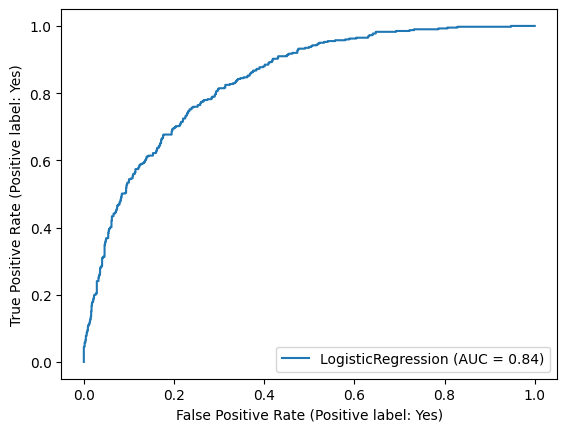

In [693]:
LogReg_1_disp = RocCurveDisplay.from_estimator(LogReg_1, X_test, y_test)

<hr/>

### IMPORTANTE

* Debemos tener en cuenta Recall cuando no podemos aceptar los falsos negativos.
* Specificity cuando no debemos aceptar falsos positivos.
* Precision cuando debemos estar seguros de los verdaderos positivos.

**¿Cuál es la pregunta de negocio? Qué métrica se quiere maximizar?**

<hr/>

Instanciamos un nuevo modelo con la expectativa de controlar la influencia de features que puedan estar disminuyendo la performance.

In [701]:
LogReg_2 = LogisticRegression(solver='saga',penalty='l2')
LogReg_2.fit(X_train, y_train)

/home/gera/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [702]:
y_test_pred_2 = LogReg_2.predict(X_test)
y_test_pred_2

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [711]:
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )
print('Accuracy=', (TP+TN)/ (TP+TN+FP+FN))
print('Total de casos correctamente predichos (TP+TN) =',(TP+TN))
print('Total de casos (TP+TN+FP+FN) =',(TP+TN+FP+FN))

TP:  219  TN:  989  FP:  120  FN:  180
Accuracy= 0.8010610079575596
Total de casos correctamente predichos (TP+TN) = 1208
Total de casos (TP+TN+FP+FN) = 1508


In [708]:
recall_score(y_test,y_test_pred_2, pos_label='No')

0.8944995491433724

In [709]:
precision_score(y_test, y_test_pred_2, pos_label='No')

0.8378378378378378

In [714]:
f1_score(y_test,y_test_pred_2, pos_label='No')

0.8652420409943306

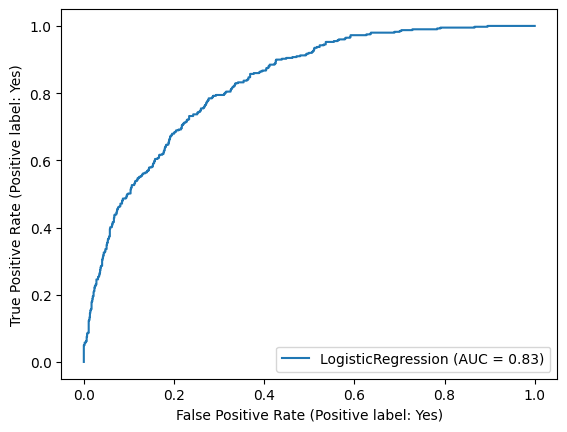

In [707]:
LogReg_2_disp = RocCurveDisplay.from_estimator(LogReg_2, X_test, y_test)

## Conclusiones


* Considerando el caso de negocio, lo que se quiere hacer, es minimizar el Churn = Yes. Estos casos se leen estadísticamente como POSITIVOS.
* También se busca es evitar o reducir al mínimo los **falsos negativos** ya que estos pueden llevar subestimar la cantidad de posibles abandonos.
* Las métricas que mejor expresan estos aspectos son PRECISION y RECALL, y F1 a través de la relación entre ambas.

**Sobre los modelos:**
* No se observaron diferencias significativas en las métricas de los dos modelos de regresión aunque LogReg_1 se mostró levemente superior considerando F1.
* Aplicar una penalidad para evitar un posible overfitting no fue suficiente para mejorar el rendimiento de las métricas en la etapa de testeo.
* Se deben intentar otras estrategias para mejorar la performance de estos modelos.
* Por falta de tiempo queda pendiente implementar otros algoritmos de clasificación.
